<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Ames_house_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AMES house Pricing data Analysis

Házi feladat
Regresszió az Ames House Prices dataset-en.

Vizualizáció, EDA
Adat tisztítás
Hiányzó adatok
Felesleges prediktorok
Hibás adatok
Változók transzformációja (normalizálás, numerikus formára hozás, stb)
Modell(ek) tanítása
Modellek kiértékelése, összehasonlítás
Beszámoló

In [138]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sweetviz as sw

Mounted at /content/drive


In [139]:
!pip install sweetviz

In [140]:
import sweetviz as sw

In [141]:
df=pd.read_csv("/content/drive/My Drive/001_AI/05_AI/hazi/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
eda=sw.analyze(df,)

In [143]:
eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[SW](SWEETVIZ_REPORT.html)

In [144]:
!ls

drive  sample_data  SWEETVIZ_REPORT.html


In [145]:
from google.colab import files
files.download("SWEETVIZ_REPORT.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Adattisztitás
Adatelemzés

## Eladási Ár ellenőrzése

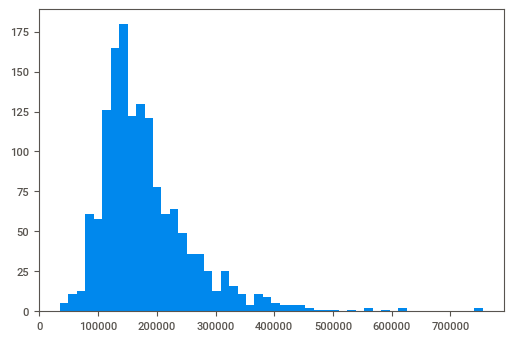

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [146]:
plt.hist(df["SalePrice"],50)
plt.show()
df["SalePrice"].describe()

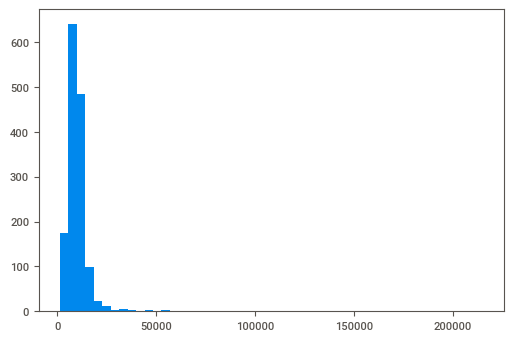

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [147]:
plt.hist(df["LotArea"],50)
plt.show()
df["LotArea"].describe()


215245 gyanús nagyon!!!

In [148]:
	heads=df.columns

In [149]:
print (heads)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [150]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [151]:
numcolumns=['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrType',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',        'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd',  'Fireplaces',  'GarageYrBlt',  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',  'MiscVal', 'MoSold', 'YrSold',   'SalePrice']

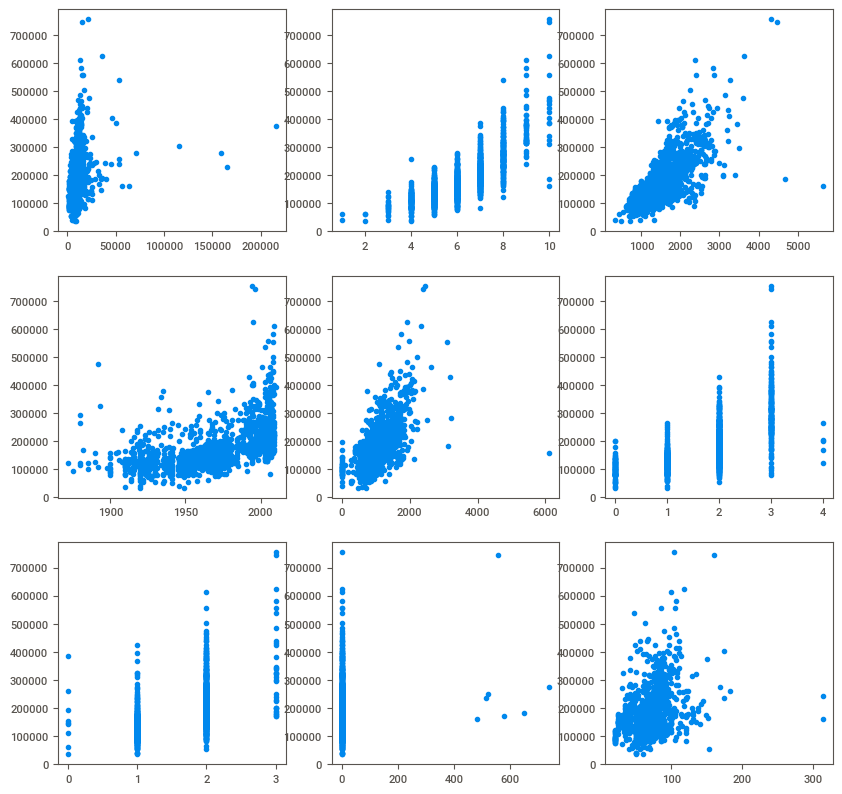

In [152]:
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.scatter(df["LotArea"],df["SalePrice"])
plt.subplot(332)
plt.scatter(df["OverallQual"],df["SalePrice"])
plt.subplot(333)
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.subplot(334)
plt.scatter(df["YearBuilt"],df["SalePrice"])
plt.subplot(335)
plt.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.subplot(336)
plt.scatter(df["GarageCars"],df["SalePrice"])
plt.subplot(337)
plt.scatter(df["FullBath"],df["SalePrice"])
plt.subplot(338)
plt.scatter(df["PoolArea"],df["SalePrice"])
plt.subplot(339)
plt.scatter(df["LotFrontage"],df["SalePrice"])
plt.show()

In [153]:

dfn=df[numcolumns]

In [154]:
dfn.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,BrkFace,196.0,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,None,0.0,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,BrkFace,162.0,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,None,0.0,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,BrkFace,350.0,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [155]:
correlacio=dfn.corr()

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

<Figure size 1000x1000 with 0 Axes>

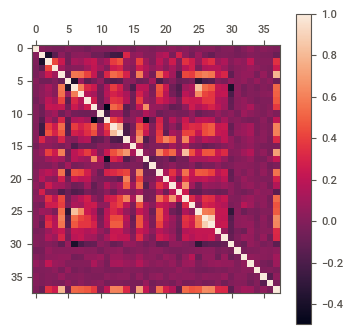

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,0.434585,0.439317,0.183926,-0.094480,0.467247,0.131881,-0.020891,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,0.179189,-0.024536,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,0.323722,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.484557,0.469672,0.405656,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,-0.053275,-0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.148112,0.362289,0.337822,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398

In [156]:
print(correlacio)
plt.figure(figsize=(10,10))

plt.matshow(correlacio)
plt.colorbar()
plt.show()
correlacio.nlargest(11,"SalePrice")

NUMERICAL ASSOCIATIONS
(PEARSON, -1 to 1)


* GrLivArea 0.71
* GarageArea 0.62
* TotalBsmtSF 0.61
* 1stFlrSF 0.61
* TotRmsAbvGrd 0.53
* YearBuilt 0.52
* YearRemodAdd 0.51
* GarageYrBlt 0.49
* MasVnrArea 0.48
* BsmtFinSF1 0.39
* LotFrontage 0.35
* WoodDeckSF 0.32
* 2ndFlrSF 0.32





In [157]:
kritical=["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

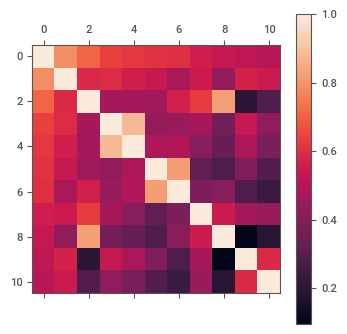

In [158]:
dfmax10=df[kritical]

CorM10=dfmax10.corr()


plt.matshow(CorM10)

plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


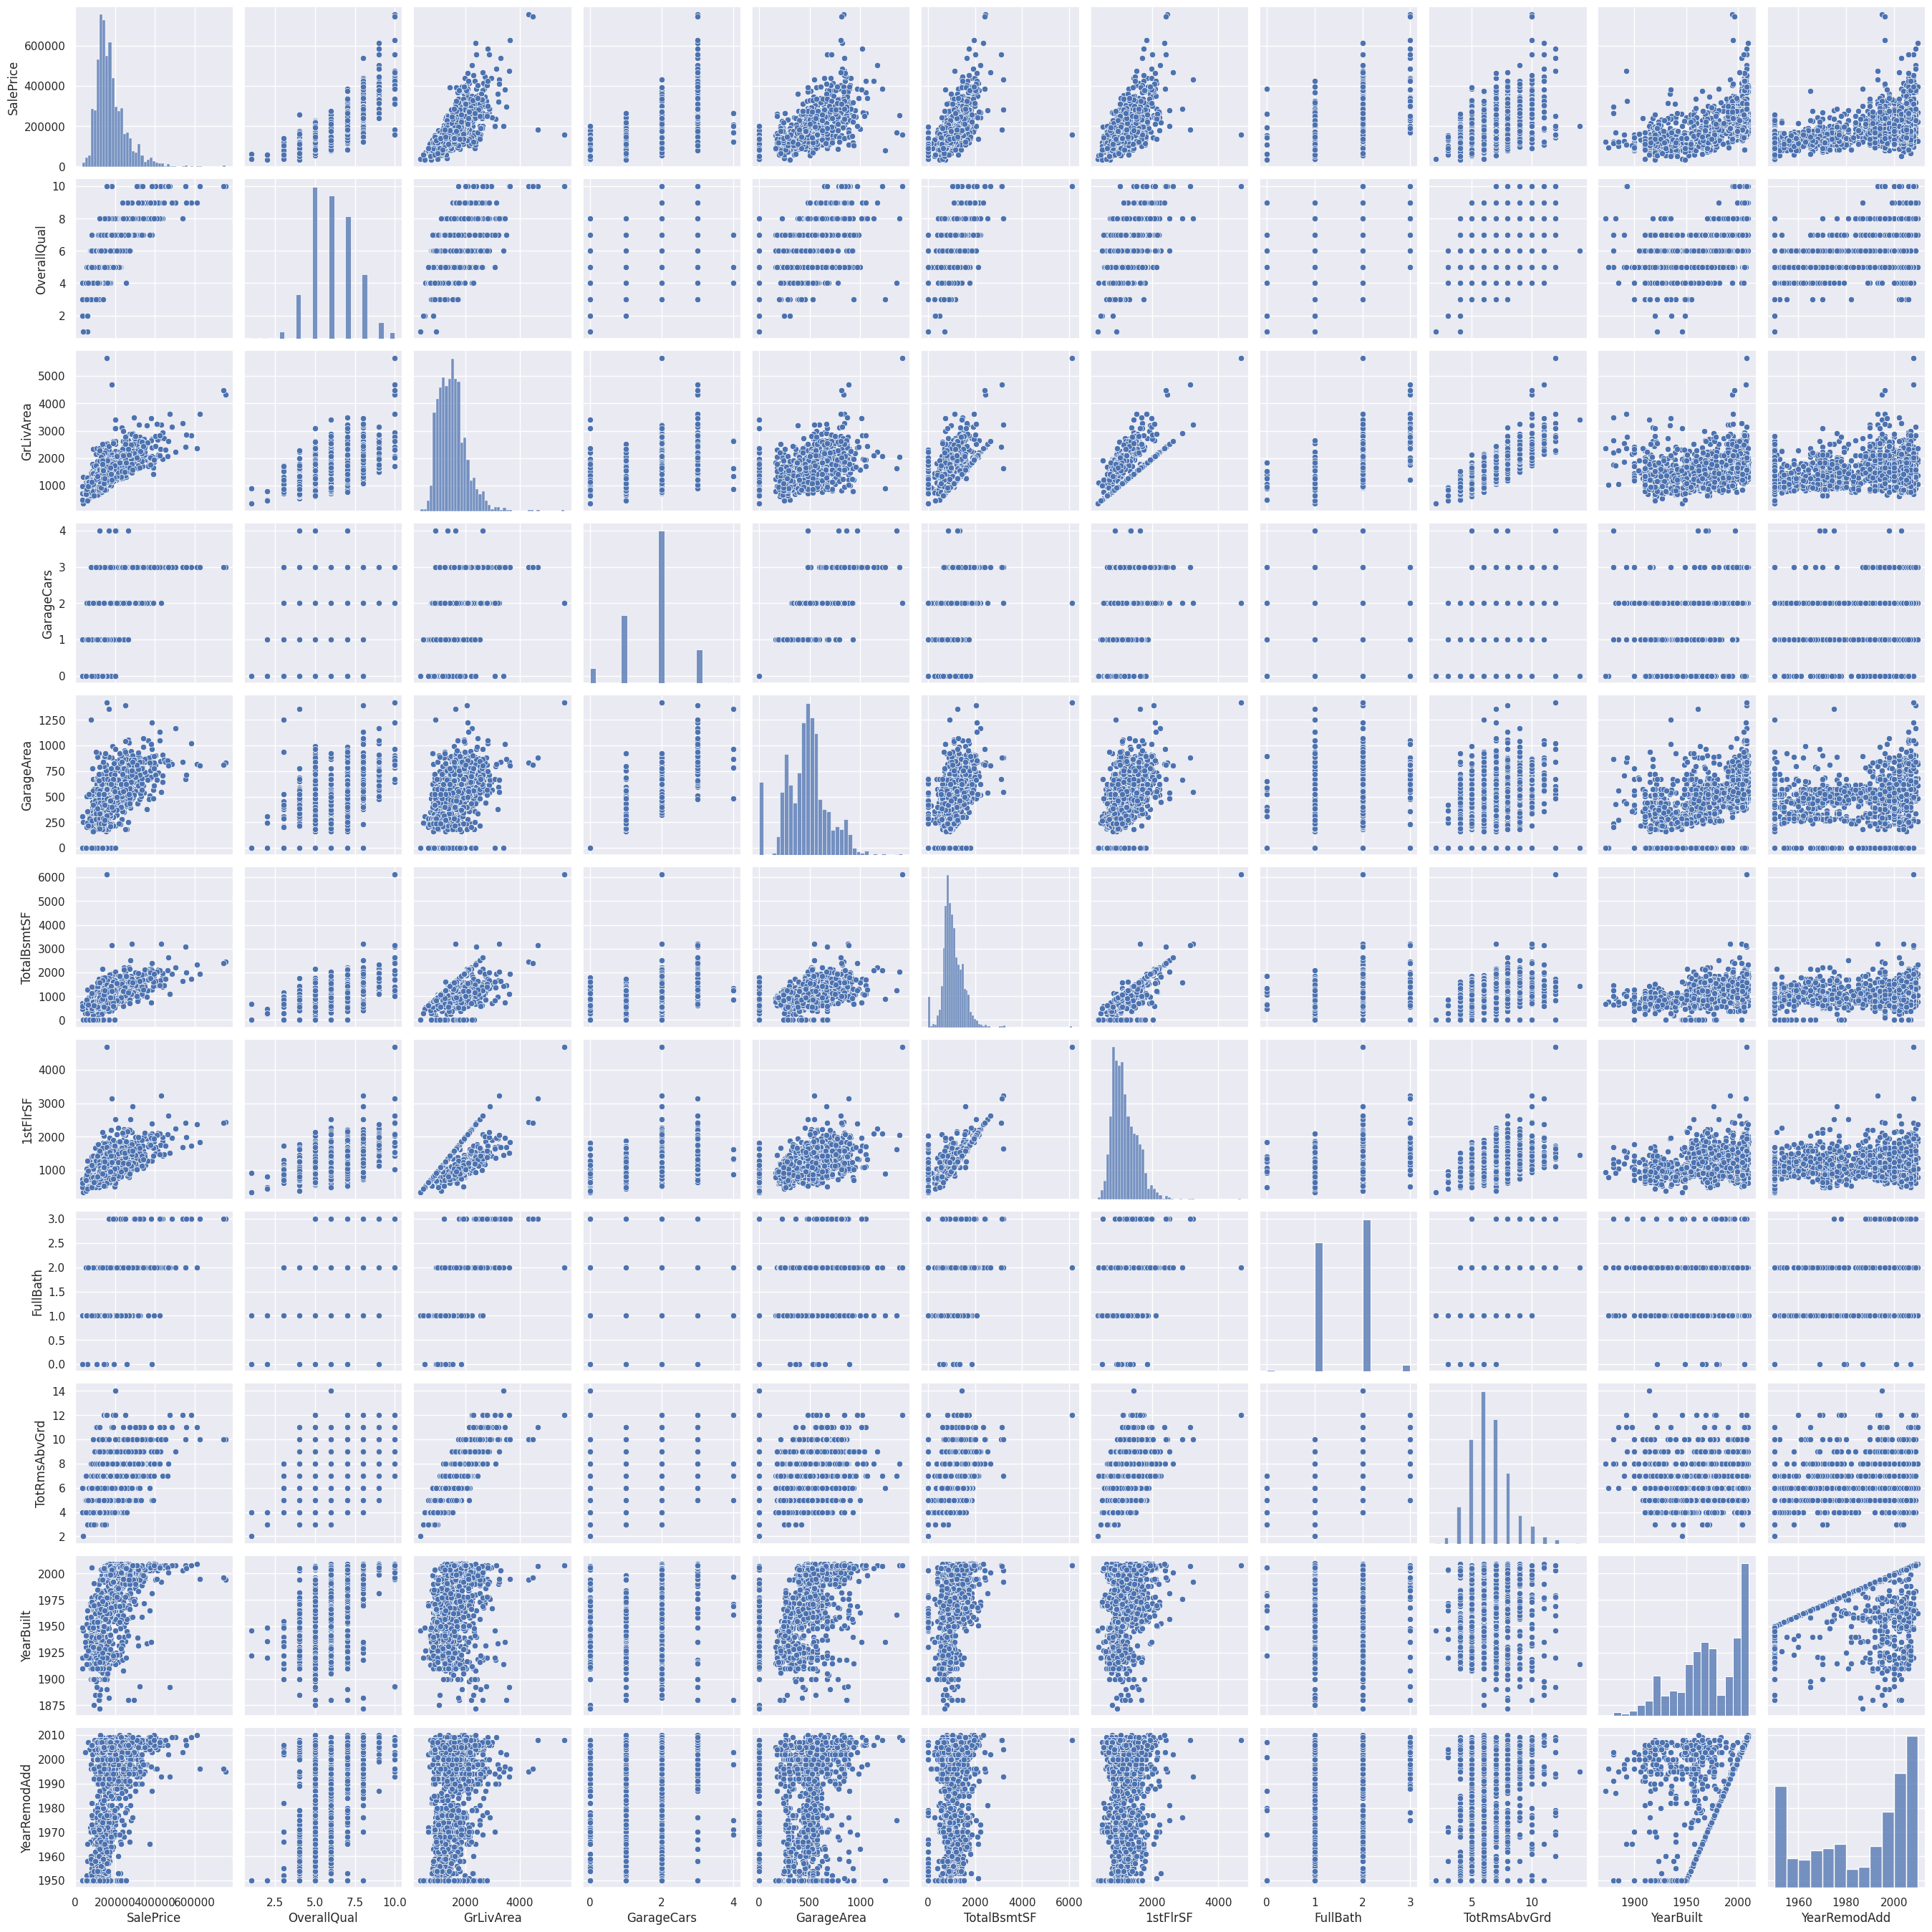

In [159]:
import seaborn as sns
sns.set()
sns.pairplot(df[kritical], size = 2.5)
plt.show();

In [160]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(df[kritical[1:]], df[kritical[0]])
lr.coef_

array([ 1.96045898e+04,  5.12971178e+01,  1.04179010e+04,  1.49475334e+01,
        1.98650991e+01,  1.41737355e+01, -6.79087146e+03,  3.31050771e+01,
        2.68240707e+02,  2.96481161e+02])

In [161]:
linpred=lr.predict(df[kritical[1:]])

linpred

array([214741.72468546, 169346.70949012, 220816.47032609, ...,
       227093.91227878, 126047.07735366, 136640.78777021])

In [162]:
diffi=(df["SalePrice"]-linpred)
print(diffi)

0       -6241.724685
1       12153.290510
2        2683.529674
3      -59794.211844
4      -32278.261233
            ...     
1455   -16896.289130
1456   -22731.061015
1457    39406.087721
1458    16077.922646
1459    10859.212230
Name: SalePrice, Length: 1460, dtype: float64


In [163]:
#print(diff)
linear_model_error=sum(list(diffi))
diffi.iloc[:]
df["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

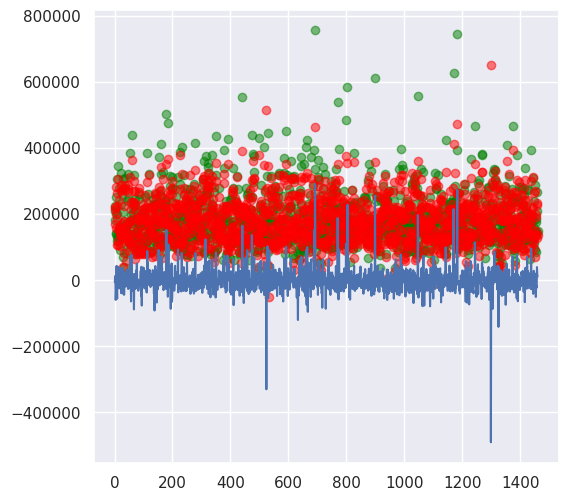

In [164]:
plt.figure(figsize=(6,6))
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],linpred[:],c="red",alpha=0.5)

plt.plot(df["Id"],diffi[:])
plt.show()

In [165]:
diffi.describe()

count    1.460000e+03
mean    -5.948345e-11
std      3.779219e+04
min     -4.899578e+05
25%     -1.931615e+04
50%     -1.948119e+03
75%      1.601953e+04
max      2.905582e+05
Name: SalePrice, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f9f45bba828>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9f45ce2b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9f45cda630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9f45ce27b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9f45bbaac8>,
  <matplotlib.lines.Line2D at 0x7f9f45ce22e8>]}

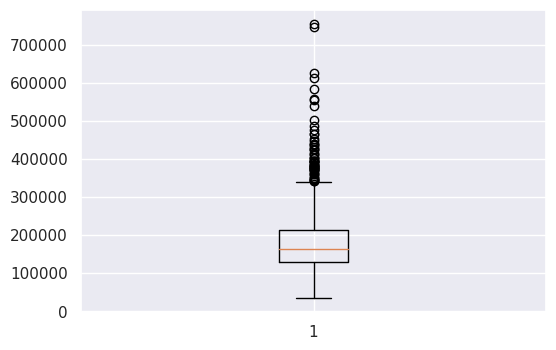

In [166]:
#nézzunk boxplotot


plt.boxplot(df["SalePrice"],)

In [167]:
huberreg=linear_model.HuberRegressor(max_iter=400)
huberreg.fit(df[kritical[1:]], df[kritical[0]])
huberreg.coef_

array([ 1.92312710e+04,  5.10320646e+01,  3.10812904e+03,  4.48499331e+01,
        3.05264434e+01,  6.01281207e+00,  3.29106157e+03, -2.27091676e+03,
        7.57721662e+01, -1.11314760e+02])

In [168]:
hubpred=huberreg.predict(df[kritical[1:]])
print(hubpred)
diffihubert=(df["SalePrice"]-hubpred)

[200856.29555093 175152.28679845 214265.84474256 ... 220352.13251168
 121616.26225069 141134.97812448]


In [169]:
from sklearn.linear_model import Lasso
lassoreg=Lasso(max_iter=400,alpha=0.1,normalize=True)
lassoreg.fit(df[kritical[1:]], df[kritical[0]])
lassoreg.coef_

array([ 1.96046395e+04,  5.12852185e+01,  1.04166803e+04,  1.49491581e+01,
        1.98671967e+01,  1.41688139e+01, -6.76080817e+03,  2.95475338e+01,
        2.68000558e+02,  2.96312510e+02])

In [170]:
lassopred=lassoreg.predict(df[kritical[1:]])
print(lassopred)
diffilasso=(df["SalePrice"]-lassopred)

[214737.50252065 169364.63164256 220819.02459558 ... 227092.7459849
 126044.88724069 136634.10381476]


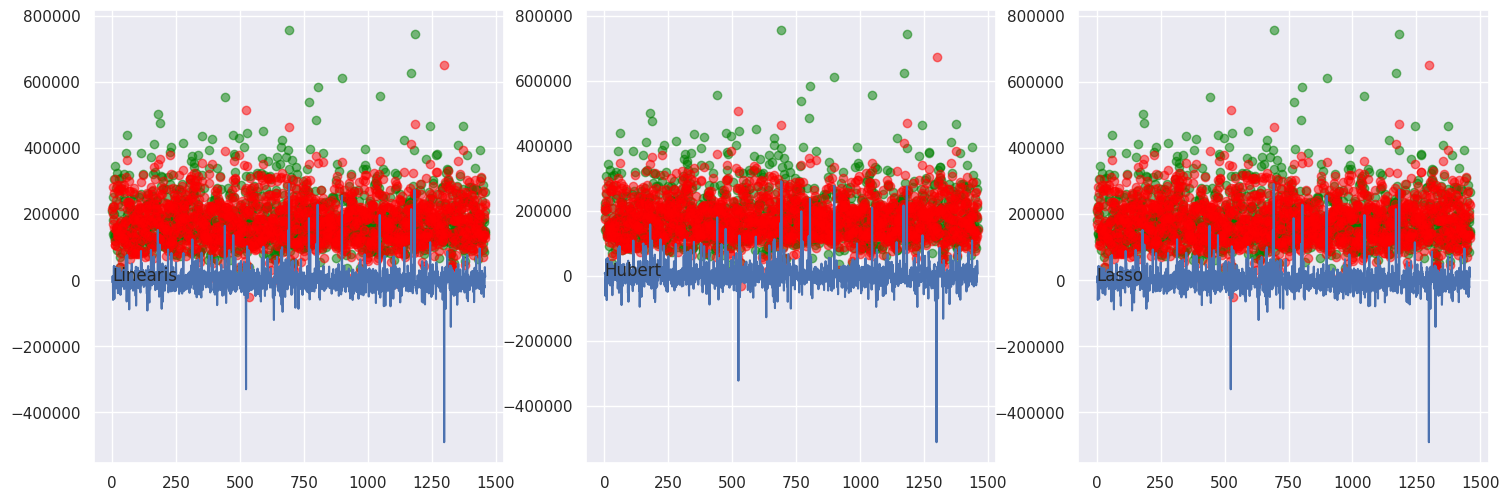

In [171]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],linpred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffi[:])
plt.text(0,0,"Linearis")


plt.subplot(132)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],hubpred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert")


plt.subplot(133)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(df["Id"],lassopred[:],c="red",alpha=0.5)
plt.plot(df["Id"],diffilasso[:])
plt.text(0,0,"Lasso")



plt.show()

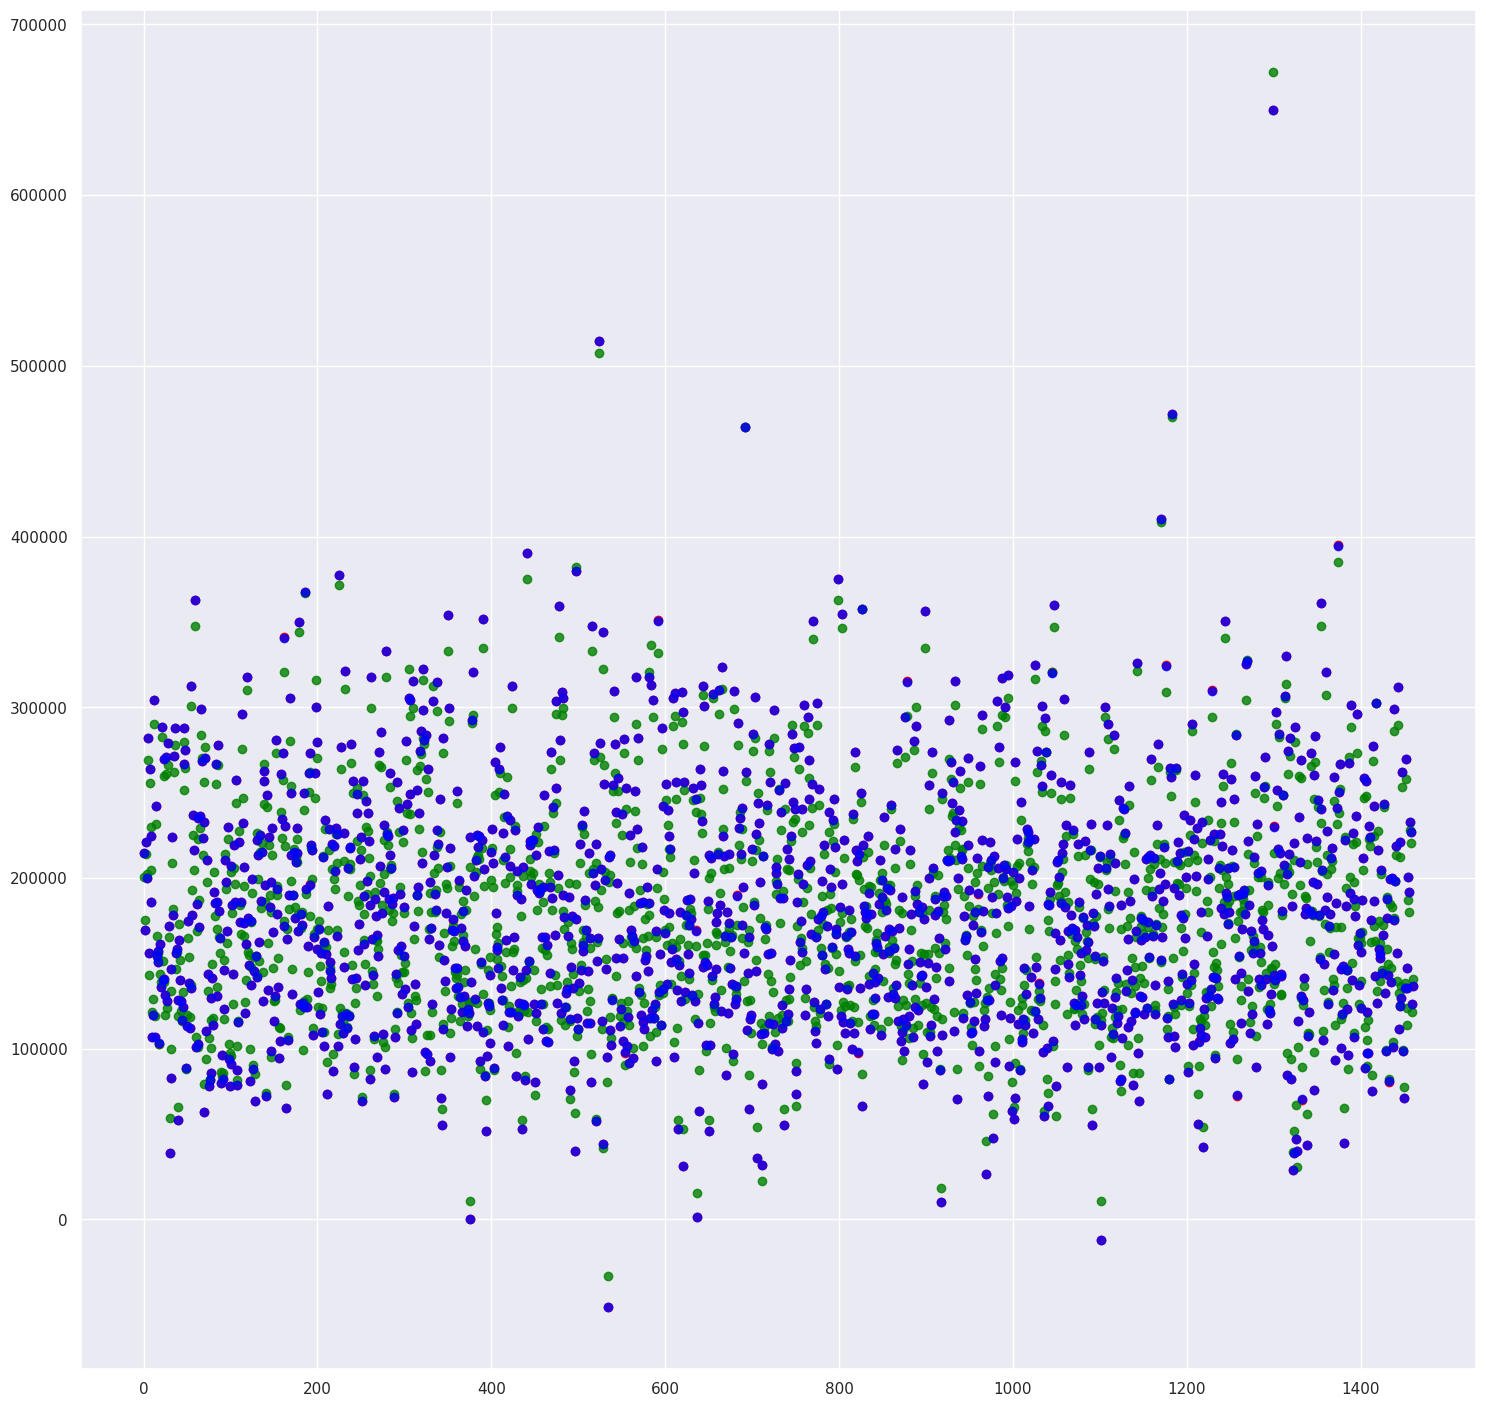

In [172]:
#NAgyon egyforma itt minden....

plt.figure(figsize=(18,18))
plt.subplot(111)

plt.scatter(df["Id"],linpred[:],c="red",alpha=1)
#plt.plot(df["Id"],diffi[:])




plt.scatter(df["Id"],hubpred[:],c="green",alpha=0.8)
#plt.plot(df["Id"],diffihubert[:])




plt.scatter(df["Id"],lassopred[:],c="blue",alpha=0.8,marker="o")
#plt.plot(df["Id"],diffilasso[:])



plt.show()





---



---


# **Vannak kiugró értékek Nézzünk Outliereket!**




In [173]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
df_kritikus=df[kritical]
y_pred = clf.fit_predict(df_kritikus)

In [174]:
df_kritikus_no_outliers=df_kritikus
#print(df_kritikus.head())
indexer=[]
print(df_kritikus.size)
for index,i in enumerate(y_pred):
    #print(index,"##",i,end=" ")
    
    if i==-1:
        print(index,"--",i)
        df_kritikus_no_outliers=df_kritikus_no_outliers.drop([index])
    else:
        indexer.append(index)
        
print(df_kritikus_no_outliers.size)


16060
30 -- -1
66 -- -1
90 -- -1
102 -- -1
113 -- -1
144 -- -1
156 -- -1
182 -- -1
250 -- -1
264 -- -1
330 -- -1
371 -- -1
383 -- -1
440 -- -1
445 -- -1
495 -- -1
523 -- -1
533 -- -1
614 -- -1
662 -- -1
666 -- -1
691 -- -1
728 -- -1
769 -- -1
778 -- -1
803 -- -1
843 -- -1
894 -- -1
897 -- -1
898 -- -1
915 -- -1
916 -- -1
921 -- -1
968 -- -1
984 -- -1
1045 -- -1
1046 -- -1
1048 -- -1
1169 -- -1
1182 -- -1
1223 -- -1
1298 -- -1
1319 -- -1
1324 -- -1
1336 -- -1
15565


## **Nézzük mit csináltunk az outlier separációval**

In [175]:
df_df_kritikus_no_outliers.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [176]:
huberreg=linear_model.HuberRegressor(max_iter=400)
huberreg.fit(df_kritikus_no_outliers[kritical[1:]], df_kritikus_no_outliers[kritical[0]])
print(huberreg.coef_)
hubpred_no_outliers=huberreg.predict(df_kritikus_no_outliers[kritical[1:]])
print(hubpred_no_outliers)
#diffihubert_no_outliers=(df["SalePrice"]-hubpred_no_outliers)

print(len(indexer))

[ 1.86834498e+04  5.07421588e+01  2.78016406e+03  4.53468327e+01
  3.21165933e+01  7.00624191e+00  3.33139113e+03 -2.04888713e+03
  7.03535754e+01 -1.05896200e+02]
[200211.06053736 175745.89855237 213355.09932429 ... 221079.88057615
 122541.20168704 142458.85529963]
1415


Text(0, 0, 'Hubert')

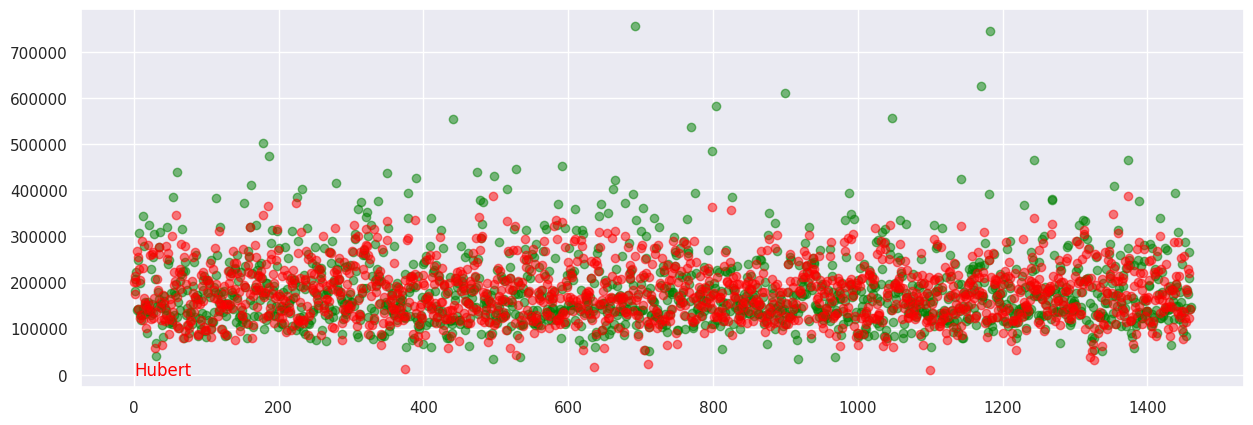

In [177]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(df["Id"],df["SalePrice"],c="green",alpha=0.5)
plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")


# **A sweetViz Mást mutat**
CATEGORICAL ASSOCIATIONS
(CORRELATION RATIO, 0 to 1)
* OverallQual 0.83
*  **Neighborhood 0.74**
* GarageCars 0.70
* ExterQual 0.69
* BsmtQual 0.68
* KitchenQual 0.68
* FullBath 0.58
* GarageFinish 0.55
* FireplaceQu 0.54
* Foundation 0.51
* GarageType 0.50
* Fireplaces 0.48
* BsmtFinType1 0.46
* HeatingQC 0.44





In [180]:
correlationMAt=df.corr()
print(correlationMAt)

                     Id  MSSubClass  LotFrontage  ...    MoSold    YrSold  SalePrice
Id             1.000000    0.011156    -0.010601  ...  0.021172  0.000712  -0.021917
MSSubClass     0.011156    1.000000    -0.386347  ... -0.013585 -0.021407  -0.084284
LotFrontage   -0.010601   -0.386347     1.000000  ...  0.011200  0.007450   0.351799
LotArea       -0.033226   -0.139781     0.426095  ...  0.001205 -0.014261   0.263843
OverallQual   -0.028365    0.032628     0.251646  ...  0.070815 -0.027347   0.790982
OverallCond    0.012609   -0.059316    -0.059213  ... -0.003511  0.043950  -0.077856
YearBuilt     -0.012713    0.027850     0.123349  ...  0.012398 -0.013618   0.522897
YearRemodAdd  -0.021998    0.040581     0.088866  ...  0.021490  0.035743   0.507101
MasVnrArea    -0.050298    0.022936     0.193458  ... -0.005965 -0.008201   0.477493
BsmtFinSF1    -0.005024   -0.069836     0.233633  ... -0.015727  0.014359   0.386420
BsmtFinSF2    -0.005968   -0.065649     0.049900  ... -0.015211  

In [212]:
a=set(df["Neighborhood"])
print(a)

{'SWISU', 'Veenker', 'NPkVill', 'Blueste', 'IDOTRR', 'Blmngtn', 'Timber', 'NAmes', 'ClearCr', 'Gilbert', 'BrDale', 'Somerst', 'CollgCr', 'BrkSide', 'OldTown', 'StoneBr', 'Mitchel', 'MeadowV', 'NWAmes', 'Sawyer', 'NoRidge', 'NridgHt', 'Crawfor', 'SawyerW', 'Edwards'}


In [193]:
df.mean()

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [221]:
salePrice_by_Neighborhood=df.groupby("Neighborhood")[["SalePrice"]].describe()
print(salePrice_by_Neighborhood)

print(salePrice_by_Neighborhood[("SalePrice","mean")])
salePrice_by_Neighborhood.columns=salePrice_by_Neighborhood.columns.droplevel(0)
print(salePrice_by_Neighborhood.columns)
dfs=salePrice_by_Neighborhood["mean"]
print(dfs)
dfs2=dfs.sort_values(0)
print(dfs2)

             SalePrice                 ...                     
                 count           mean  ...        75%       max
Neighborhood                           ...                     
Blmngtn           17.0  194870.882353  ...  213490.00  264561.0
Blueste            2.0  137500.000000  ...  144250.00  151000.0
BrDale            16.0  104493.750000  ...  118000.00  125000.0
BrkSide           58.0  124834.051724  ...  141175.00  223500.0
ClearCr           28.0  212565.428571  ...  242225.00  328000.0
CollgCr          150.0  197965.773333  ...  225725.00  424870.0
Crawfor           51.0  210624.725490  ...  239000.00  392500.0
Edwards          100.0  128219.700000  ...  145225.00  320000.0
Gilbert           79.0  192854.506329  ...  197200.00  377500.0
IDOTRR            37.0  100123.783784  ...  120500.00  169500.0
MeadowV           17.0   98576.470588  ...  115000.00  151400.0
Mitchel           49.0  156270.122449  ...  171000.00  271000.0
NAmes            225.0  145847.080000  .

In [225]:
dfs2_enum=dfs2.index
print(dfs2_enum)

Index(['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr',
       'Somerst', 'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
      dtype='object', name='Neighborhood')


**És megvan a kerületek rangsora... :-)**